ASSIGNMENT -->
---
Make a network that has:
1.   6 Convolution layers with these kernels (10, 10, 20, 20, 30)
1.   No fully connected layer(you probably may have to use the Global Average Pooling layer)
1.   uses EMNIST as the dataset
1.   uses a maximum of 2 max-pooling layers
---
Your code MUST be:
1.   well documented
1.   must mention the receptive field calculations (as we discussed in the class)
1.   must mention the input and output size for each layer
1.   must be trained for minimum of 20 epochs
1.   training MUST happen on the GPU
---
Once done, upload the code with training logs from colab to GitHub, and share the GitHub link

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
traindata = torchvision.datasets.EMNIST(root = './data', train = True, download = True, split = 'byclass',
                                        transform = transforms.Compose([
                                                                        transforms.ToTensor()
                                                                        ])
                                        )

testdata = torchvision.datasets.EMNIST(root = './data', train = False, download = True, split = 'byclass',
                                        transform = transforms.Compose([
                                                                        transforms.ToTensor()
                                                                        ])
                                        )


Extracting ./data/EMNIST/raw/emnist.zip to ./data/EMNIST/raw
Processing byclass


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Processing bymerge
Processing balanced
Processing letters
Processing digits
Processing mnist
Done!


In [4]:
print("length of traindata is {} and length of testdata is {}".format(len(traindata), len(testdata)))

length of traindata is 697932 and length of testdata is 116323


torch.Size([1, 28, 28])


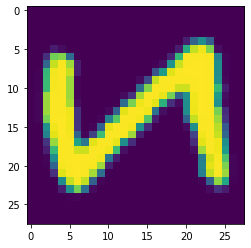

In [5]:
image, label = traindata[0]

print(image.shape)
plt.imshow(image.squeeze())

In [6]:
print("Target classes -> {}".format( traindata.train_labels.unique()))
print("Number of Target classes -> {}".format(len(traindata.train_labels.unique())))
print("Classwise bincount -> {}".format(traindata.train_labels.bincount()))

Target classes -> tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61])
Number of Target classes -> 62
Classwise bincount -> tensor([34585, 38374, 34203, 35143, 33535, 31416, 34232, 35754, 33946, 33847,
         6407,  3878, 10094,  4562,  4934,  9182,  2517,  3152, 11946,  3762,
         2468,  5076,  9002,  8237, 24983,  8347,  2605,  5073, 20764,  9820,
        12602,  4637,  4695,  2771,  4743,  2701, 10033,  5159,  2854, 10177,
        24631,  2561,  3687,  8738,  2725,  1896,  2491, 15318,  2645, 11418,
         2749,  2448,  2994, 14105,  2699, 18262,  2830,  2910,  2697,  2822,
         2365,  2725])


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [7]:
trainloader = torch.utils.data.DataLoader(traindata, batch_size = 32, shuffle = True)
testloader = torch.utils.data.DataLoader(testdata , batch_size = 32)

In [8]:
'''
Make a network that has:
6 Convolution layers with these kernels (10, 10, 20, 20, 30)
No fully connected layer(you probably may have to use the Global Average Pooling layer)
uses EMNIST as the dataset
uses a maximum of 2 max-pooling layers

Your code MUST be:
well documented
must mention the receptive field calculations (as we discussed in the class)
must mention the input and output size for each layer
must be trained for minimum of 20 epochs
training MUST happen on the GPU
'''

class Network(nn.Module):
    def __init__(self):
        
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 10, kernel_size = 3)  ## 28       >> 26x26x10 ---> RF: 3
        self.conv2 = nn.Conv2d(in_channels = 10, out_channels = 10, kernel_size = 3) ## 26x26x10 >> 24x24x10 ---> RF: 5
        self.conv3 = nn.Conv2d(in_channels = 10, out_channels = 20, kernel_size = 3) ## 24x24x10 >> 22x22x20 ---> RF: 7
        self.conv4 = nn.Conv2d(in_channels = 20, out_channels = 20, kernel_size = 3) ## 22x22x20 >> 20x20x20 ---> RF: 9
        self.pool1 = nn.MaxPool2d(2, 2)                                              ## 20x20x20 >> 10x10x20 ---> RF: 18
        self.conv5 = nn.Conv2d(in_channels = 20, out_channels = 30, kernel_size = 3) ## 10x10x20 >> 8x8x30   ---> RF: 20
        self.conv6 = nn.Conv2d(in_channels = 30, out_channels = 62, kernel_size = 3) ## 8x8x30   >> 6x6x62   ---> RF: 22
        
        self.out = nn.AdaptiveAvgPool2d(1)

    def forward(self, t):

        t = self.conv1(t)
        t = F.relu(t)

        t = self.conv2(t)
        t = F.relu(t)

        t = self.conv3(t)
        t = F.relu(t)

        t = self.conv4(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)

        t = self.conv5(t)
        t = F.relu(t)

        t = self.conv6(t)
        t = F.relu(t)
        
        t = self.out(t)
        t = F.softmax(t.view(-1,62), dim=1)
        return t

In [9]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


In [10]:
from torchsummary import summary

model = Network().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]             100
            Conv2d-2           [-1, 10, 24, 24]             910
            Conv2d-3           [-1, 20, 22, 22]           1,820
            Conv2d-4           [-1, 20, 20, 20]           3,620
            Conv2d-5             [-1, 30, 8, 8]           5,430
            Conv2d-6             [-1, 62, 6, 6]          16,802
 AdaptiveAvgPool2d-7             [-1, 62, 1, 1]               0
Total params: 28,682
Trainable params: 28,682
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.26
Params size (MB): 0.11
Estimated Total Size (MB): 0.37
----------------------------------------------------------------


In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [16]:
def get_num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).sum().item()

epochs = 20

model.train()
for i in range(epochs):

    total_loss = 0
    total_correct = 0
    batch_number = 0
    for batch in trainloader: # Get Batch
        batch_number+=1
        images, labels = batch 
        images,labels = images.to(device), labels.to(device)
        preds = model(images) # Pass Batch
        loss = F.cross_entropy(preds, labels) # Calculate Loss

        optimizer.zero_grad()
        loss.backward()  # Calculate Gradients
        optimizer.step() # Update Weights

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)

    print(
        "epoch:", i, 
        "total_correct:", total_correct, 
        "loss:", total_loss,
        "Acc:", total_correct/len(traindata)
    )

### Stopped after a few epochs since accuracy wont increase(!!!!)

epoch: 0 total_correct: 33847 loss: 89555.46739387512 Acc: 0.048496128562667995
epoch: 1 total_correct: 33847 loss: 89555.46739578247 Acc: 0.048496128562667995
epoch: 2 total_correct: 33847 loss: 89555.41531205177 Acc: 0.048496128562667995
epoch: 3 total_correct: 33847 loss: 89555.4673948288 Acc: 0.048496128562667995


KeyboardInterrupt: ignored